In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import datetime

In [2]:
mta_congestion_pricing_data = pd.read_csv('MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250404.csv')
mta_congestion_pricing_data.head()

,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
0,03/29/2025,03/29/2025 11:00:00 PM,03/29/2025 11:50:00 PM,50,23,7,Saturday,03/23/2025,Overnight,"1 - Cars, Pickups and Vans",Brooklyn Bridge,Brooklyn,103,99
1,03/29/2025,03/29/2025 11:00:00 PM,03/29/2025 11:50:00 PM,50,23,7,Saturday,03/23/2025,Overnight,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,97,2
2,03/29/2025,03/29/2025 11:00:00 PM,03/29/2025 11:50:00 PM,50,23,7,Saturday,03/23/2025,Overnight,TLC Taxi/FHV,West 60th St,West 60th St,197,0
3,03/29/2025,03/29/2025 11:00:00 PM,03/29/2025 11:50:00 PM,50,23,7,Saturday,03/23/2025,Overnight,TLC Taxi/FHV,Queensboro Bridge,Queens,77,0
4,03/29/2025,03/29/2025 11:00:00 PM,03/29/2025 11:50:00 PM,50,23,7,Saturday,03/23/2025,Overnight,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,137,0


In [3]:
mta_crossings_2019_data = pd.read_csv('MTA_Bridges_and_Tunnels_Hourly_Crossings__Beginning_2019.csv')
mta_crossings_2019_data.head()

,Transit Timestamp,Date,Hour,Facility ID,Facility,Direction,Payment Method,Vehicle Class,Vehicle Class Description,Vehicle Class Category,Traffic Count
0,03/04/2025 06:00:00 AM,03/04/2025,6,22,Triborough Manhattan Bridge,Eastbound to Bronx or Queens,Tolls by Mail,31,2-axle passenger car,Car,137
1,03/04/2025 12:00:00 AM,03/04/2025,0,22,Triborough Manhattan Bridge,Eastbound to Bronx or Queens,Tolls by Mail,31,2-axle passenger car,Car,91
2,03/04/2025 11:00:00 AM,03/04/2025,11,22,Triborough Manhattan Bridge,Eastbound to Bronx or Queens,Tolls by Mail,31,2-axle passenger car,Car,239
3,03/04/2025 09:00:00 AM,03/04/2025,9,22,Triborough Manhattan Bridge,Eastbound to Bronx or Queens,Tolls by Mail,31,2-axle passenger car,Car,232
4,03/04/2025 02:00:00 PM,03/04/2025,14,22,Triborough Manhattan Bridge,Eastbound to Bronx or Queens,Tolls by Mail,31,2-axle passenger car,Car,332


In [11]:
mta_daily_ridership_2025_data = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_2025.csv')
mta_daily_ridership_2025_data['transit_timestamp'] = pd.to_datetime(mta_daily_ridership_2025_data['transit_timestamp'])
mta_daily_ridership_2025_data.head()

/tmp/ipykernel_65930/618308657.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mta_daily_ridership_2025_data = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_2025.csv')
/tmp/ipykernel_65930/618308657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mta_daily_ridership_2025_data['transit_timestamp'] = pd.to_datetime(mta_daily_ridership_2025_data['transit_timestamp'])


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2025-01-03 00:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,omny,OMNY - Full Fare,12,7,40.757340,-73.95412,POINT (-73.95412 40.75734)
1,2025-01-03 06:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Seniors & Disability,1,1,40.761337,-73.96416,POINT (-73.96416 40.761337)
2,2025-01-03 07:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Unlimited 30-Day,10,0,40.757340,-73.95412,POINT (-73.95412 40.75734)
3,2025-01-03 08:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Unlimited 30-Day,5,0,40.761337,-73.96416,POINT (-73.96416 40.761337)
4,2025-01-03 10:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Students,1,0,40.761337,-73.96416,POINT (-73.96416 40.761337)


In [5]:
# see what the facility vs Detection group are
print(mta_congestion_pricing_data['Detection Group'].unique())
print(mta_crossings_2019_data['Facility'].unique())

['Brooklyn Bridge' 'West Side Highway at 60th St' 'West 60th St'
 'Queensboro Bridge' 'Queens Midtown Tunnel' 'Lincoln Tunnel'
 'Holland Tunnel' 'FDR Drive at 60th St' 'East 60th St'
 'Williamsburg Bridge' 'Manhattan Bridge' 'Hugh L. Carey Tunnel']
['Triborough Manhattan Bridge' 'Bronx Whitestone Bridge'
 'Henry Hudson Bridge' 'Marine Parkway Bridge' 'Cross Bay Bridge'
 'Queens Midtown Tunnel' 'Brooklyn Battery Tunnel' 'Throgs Neck Bridge'
 'Verrazano Narrows Bridge' 'Triborough Bronx Bridge']


In [6]:
# find the date range for congrestion pricing dat
mta_congestion_pricing_data['Toll Date'].unique()

array(['03/29/2025', '03/28/2025', '03/27/2025', '03/26/2025',
       '03/25/2025', '03/24/2025', '03/23/2025', '03/22/2025',
       '03/21/2025', '03/20/2025', '03/19/2025', '03/18/2025',
       '03/17/2025', '03/16/2025', '03/15/2025', '03/14/2025',
       '03/13/2025', '03/12/2025', '03/11/2025', '03/10/2025',
       '03/09/2025', '03/08/2025', '03/07/2025', '03/06/2025',
       '03/05/2025', '03/04/2025', '03/03/2025', '03/02/2025',
       '03/01/2025', '02/28/2025', '02/27/2025', '02/26/2025',
       '02/25/2025', '02/24/2025', '02/23/2025', '02/22/2025',
       '02/21/2025', '02/20/2025', '02/19/2025', '02/18/2025',
       '02/17/2025', '02/16/2025', '02/15/2025', '02/14/2025',
       '02/13/2025', '02/12/2025', '02/11/2025', '02/10/2025',
       '02/09/2025', '02/08/2025', '02/07/2025', '02/06/2025',
       '02/05/2025', '02/04/2025', '02/03/2025', '02/02/2025',
       '02/01/2025', '01/31/2025', '01/30/2025', '01/29/2025',
       '01/28/2025', '01/27/2025', '01/26/2025', '01/25

In [8]:
# find the vehicle class category
print(mta_crossings_2019_data['Vehicle Class Category'].unique())
print(mta_congestion_pricing_data['Vehicle Class'].unique())

['Car' 'Truck' 'Bus' 'Motorcycle']
['1 - Cars, Pickups and Vans' 'TLC Taxi/FHV' '5 - Motorcycles' '4 - Buses'
 '3 - Multi-Unit Trucks' '2 - Single-Unit Trucks']


In [ ]:
max(mta_daily_ridership_2025_data['Date'])

Timestamp('2025-01-09 00:00:00')

In [30]:
list(mta_daily_ridership_2025_data.columns)

['transit_timestamp',
 'transit_mode',
 'station_complex_id',
 'station_complex',
 'borough',
 'payment_method',
 'fare_class_category',
 'ridership',
 'transfers',
 'latitude',
 'longitude',
 'Georeference']

In [44]:
mta_daily_ridership_2025_data['hour'] = mta_daily_ridership_2025_data[
    'transit_timestamp'
].dt.hour
mta_daily_ridership_2025_data['date'] = mta_daily_ridership_2025_data[
    'transit_timestamp'
].dt.date

hourly_ridership = (
    mta_daily_ridership_2025_data
    .groupby(['station_complex_id', 'date','hour'], as_index=False)
    .agg({
        'ridership': 'sum',
        'station_complex': 'first',
        'latitude': 'first',
        'longitude': 'first',
        'transit_mode': 'first'
    })
)

hourly_ridership['datehour'] = pd.to_datetime(
    hourly_ridership['date'].astype(str) + ' ' + hourly_ridership['hour'].astype(str) + ':00:00'
)

hourly_ridership.head()

,station_complex_id,date,hour,ridership,station_complex,latitude,longitude,transit_mode,datehour
0,1,2025-01-01,0,99,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 00:00:00
1,1,2025-01-01,1,99,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 01:00:00
2,1,2025-01-01,2,54,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 02:00:00
3,1,2025-01-01,3,30,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 03:00:00
4,1,2025-01-01,4,28,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 04:00:00


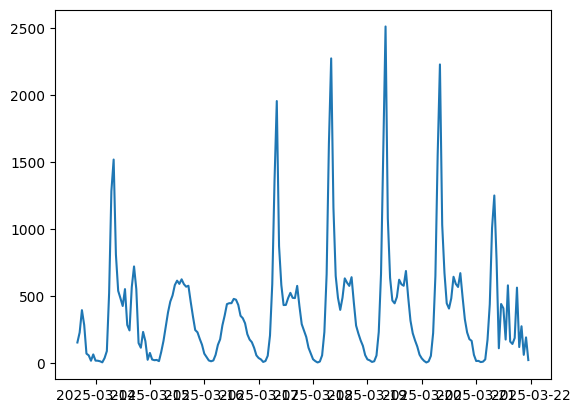

In [52]:
plt.plot(hourly_ridership[hourly_ridership['station_complex_id'] == 1]['datehour'].iloc[-200:], hourly_ridership[hourly_ridership['station_complex_id'] == 1]['ridership'].iloc[-200:])

In [ ]:
#response = requests.get('https://data.ny.gov/resource/wujg-7c2s.json?$limit=300000')

In [ ]:
# open("response_data.json", "w", encoding="utf-8") as f:
#json.dump(response.json(), f, indent=4)

In [ ]:
mta_daily_ridership_2020_2024_data = pd.read_csv('MTA_Subway_Hourly_Ridership__2020-2024_20250404.csv')
print(max(mta_daily_ridership_2020_2024_data['transit_timestamp'].unique()))
mta_daily_ridership_2020_2024_data['transit_timestamp'] = pd.to_datetime(mta_daily_ridership_2020_2024_data['transit_timestamp'])
mta_daily_ridership_2020_2024_data.head()

12/31/2024 12:00:00 PM


/tmp/ipykernel_65930/220233685.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mta_daily_ridership_2020_2024_data['transit_timestamp'] = pd.to_datetime(mta_daily_ridership_2020_2024_data['transit_timestamp'])


In [27]:
mta_daily_ridership_2023_2024_data = mta_daily_ridership_2020_2024_data[mta_daily_ridership_2020_2024_data['transit_timestamp'] >= pd.to_datetime('2023-12-31')]
mta_daily_ridership_2023_2024_data['transit_timestamp'].unique()

<DatetimeArray>
['2023-12-31 22:00:00', '2023-12-31 23:00:00', '2024-01-01 00:00:00',
 '2024-01-01 01:00:00', '2024-01-01 02:00:00', '2024-01-01 03:00:00',
 '2024-01-01 04:00:00', '2024-01-01 05:00:00', '2024-01-01 06:00:00',
 '2024-01-01 07:00:00',
 ...
 '2024-12-31 14:00:00', '2024-12-31 15:00:00', '2024-12-31 16:00:00',
 '2024-12-31 17:00:00', '2024-12-31 18:00:00', '2024-12-31 19:00:00',
 '2024-12-31 20:00:00', '2024-12-31 21:00:00', '2024-12-31 22:00:00',
 '2024-12-31 23:00:00']
Length: 8785, dtype: datetime64[ns]

In [ ]:
#mta_daily_ridership_2023_2024_data['transit_mode'].unique()

array(['subway', 'staten_island_railway'], dtype=object)

In [ ]:
#min(mta_daily_ridership_2023_2024_data['transit_timestamp'].unique())

'2022-05-10T00:00:00.000'

In [12]:
mta_daily_ridership_2025_data['transit_mode'].unique()

array(['tram', 'subway', 'staten_island_railway'], dtype=object)

In [13]:
mta_daily_ridership_2025_data.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2025-01-03 00:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,omny,OMNY - Full Fare,12,7,40.757340,-73.95412,POINT (-73.95412 40.75734)
1,2025-01-03 06:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Seniors & Disability,1,1,40.761337,-73.96416,POINT (-73.96416 40.761337)
2,2025-01-03 07:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Unlimited 30-Day,10,0,40.757340,-73.95412,POINT (-73.95412 40.75734)
3,2025-01-03 08:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Unlimited 30-Day,5,0,40.761337,-73.96416,POINT (-73.96416 40.761337)
4,2025-01-03 10:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Students,1,0,40.761337,-73.96416,POINT (-73.96416 40.761337)


In [28]:
# join mta data together
mta_daily_ridership_all_data = pd.concat([mta_daily_ridership_2025_data, mta_daily_ridership_2023_2024_data])

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2025-01-03 00:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,omny,OMNY - Full Fare,12,7,40.757340,-73.954120,POINT (-73.95412 40.75734)
1,2025-01-03 06:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Seniors & Disability,1,1,40.761337,-73.964160,POINT (-73.96416 40.761337)
2,2025-01-03 07:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Unlimited 30-Day,10,0,40.757340,-73.954120,POINT (-73.95412 40.75734)
3,2025-01-03 08:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Unlimited 30-Day,5,0,40.761337,-73.964160,POINT (-73.96416 40.761337)
4,2025-01-03 10:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Students,1,0,40.761337,-73.964160,POINT (-73.96416 40.761337)
...,...,...,...,...,...,...,...,...,...,...,...,...
27029158,2024-12-31 23:00:00,subway,369,Elder Av (6),Bronx,omny,OMNY - Students,2,0,40.828583,-73.879160,POINT (-73.87916 40.828583)
27029159,2024-12-31 23:00:00,subway,189,Grant Av (A),Brooklyn,omny,OMNY - Full Fare,8,0,40.677044,-73.865050,POINT (-73.86505 40.677044)
27029160,2024-12-31 23:00:00,subway,419,"225 St (2,5)",Bronx,omny,OMNY - Full Fare,3,0,40.888023,-73.860344,POINT (-73.860344 40.888023)
27029161,2024-12-31 23:00:00,subway,79,86 St (N),Brooklyn,omny,OMNY - Full Fare,7,0,40.592720,-73.978230,POINT (-73.97823 40.59272)


In [30]:
mta_daily_ridership_all_data['hour'] = mta_daily_ridership_all_data[
    'transit_timestamp'
].dt.hour
mta_daily_ridership_all_data['date'] = mta_daily_ridership_all_data[
    'transit_timestamp'
].dt.date

hourly_ridership = (
    mta_daily_ridership_all_data
    .groupby(['station_complex_id', 'date','hour'], as_index=False)
    .agg({
        'ridership': 'sum',
        'station_complex': 'first',
        'latitude': 'first',
        'longitude': 'first',
        'transit_mode': 'first'
    })
)

hourly_ridership['datehour'] = pd.to_datetime(
    hourly_ridership['date'].astype(str) + ' ' + hourly_ridership['hour'].astype(str) + ':00:00'
)

hourly_ridership.head()

,station_complex_id,date,hour,ridership,station_complex,latitude,longitude,transit_mode,datehour
0,1,2025-01-01,0,99,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 00:00:00
1,1,2025-01-01,1,99,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 01:00:00
2,1,2025-01-01,2,54,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 02:00:00
3,1,2025-01-01,3,30,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 03:00:00
4,1,2025-01-01,4,28,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 04:00:00


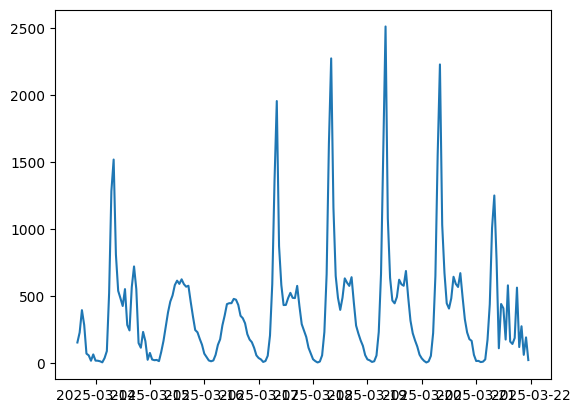

In [33]:
plt.plot(hourly_ridership[hourly_ridership['station_complex_id'] == 1]['datehour'].iloc[-200:], hourly_ridership[hourly_ridership['station_complex_id'] == 1]['ridership'].iloc[-200:])

In [32]:
hourly_ridership[['station_complex_id', 'ridership', 'station_complex', 'latitude', 'longitude', 'transit_mode', 'datehour']].to_csv('processed_rideshare.csv', index=False)

In [40]:
subway_rideshare_data = pd.read_csv('processed_rideshare.csv.gz')
subway_rideshare_data['datehour'] = pd.to_datetime(subway_rideshare_data['datehour'])
subway_rideshare_data.head()

/tmp/ipykernel_65930/4232960376.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_rideshare_data = pd.read_csv('processed_rideshare.csv.gz')


,station_complex_id,ridership,station_complex,latitude,longitude,transit_mode,datehour
0,1,99,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 00:00:00
1,1,99,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 01:00:00
2,1,54,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 02:00:00
3,1,30,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 03:00:00
4,1,28,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-01 04:00:00


In [67]:
# find congestion pricing period
congestion_pricing_period = subway_rideshare_data[subway_rideshare_data['datehour'] >= pd.to_datetime('2025-01-05')]
congestion_pricing_period['month'] = congestion_pricing_period['datehour'].dt.month
congestion_pricing_period['day'] = congestion_pricing_period['datehour'].dt.day
congestion_pricing_period['hour'] = congestion_pricing_period['datehour'].dt.hour
# find the 1 year prior stats
one_year_prior_period = subway_rideshare_data[
    (subway_rideshare_data["datehour"] >= pd.to_datetime("2024-01-05")) &
    (subway_rideshare_data["datehour"] <= pd.to_datetime("2024-04-04"))
]
one_year_prior_period['month'] = one_year_prior_period['datehour'].dt.month
one_year_prior_period['day'] = one_year_prior_period['datehour'].dt.day
one_year_prior_period['hour'] = one_year_prior_period['datehour'].dt.hour
print(one_year_prior_period.head())
print(one_year_prior_period.shape)
print(congestion_pricing_period.head())
print(congestion_pricing_period.shape)

       station_complex_id  ridership             station_complex   latitude  \
788535                  1         35  Astoria-Ditmars Blvd (N,W)  40.775036   
788536                  1          5  Astoria-Ditmars Blvd (N,W)  40.775036   
788537                  1         15  Astoria-Ditmars Blvd (N,W)  40.775036   
788538                  1         15  Astoria-Ditmars Blvd (N,W)  40.775036   
788539                  1         56  Astoria-Ditmars Blvd (N,W)  40.775036   

        longitude transit_mode            datehour  month  day  hour  
788535  -73.91203       subway 2024-01-05 00:00:00      1    5     0  
788536  -73.91203       subway 2024-01-05 01:00:00      1    5     1  
788537  -73.91203       subway 2024-01-05 02:00:00      1    5     2  
788538  -73.91203       subway 2024-01-05 03:00:00      1    5     3  
788539  -73.91203       subway 2024-01-05 04:00:00      1    5     4  
(904869, 10)
    station_complex_id  ridership             station_complex   latitude  \
96        

/tmp/ipykernel_65930/64873518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion_pricing_period['month'] = congestion_pricing_period['datehour'].dt.month
/tmp/ipykernel_65930/64873518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion_pricing_period['day'] = congestion_pricing_period['datehour'].dt.day
/tmp/ipykernel_65930/64873518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [70]:
# take the differential 
merged = pd.merge(
    congestion_pricing_period,
    one_year_prior_period,
    on=["station_complex_id", "month", "day", "hour"],
    how="inner",  # or "outer" if you need to keep non-matching rows
    suffixes=("_cur", "_prev")  # rename overlapping columns
)

merged["ridership_diff"] = merged["ridership_cur"] - merged["ridership_prev"]
merged[['station_complex', 'latitude', 'longitude', 'transit_mode', 'datehour']] = merged[['station_complex_cur', 'latitude_cur', 'longitude_cur', 'transit_mode_cur', 'datehour_cur']]
print(merged.head())

# Pick only the columns you need in your final DataFrame
before_after_data = merged[
    [
        "station_complex_id",
        "station_complex",  
        "latitude",
        "longitude",
        "transit_mode",
        "datehour",
        "ridership_diff"
    ]
]
before_after_data.head()

  station_complex_id  ridership_cur         station_complex_cur  latitude_cur  \
0                  1             36  Astoria-Ditmars Blvd (N,W)     40.775036   
1                  1             25  Astoria-Ditmars Blvd (N,W)     40.775036   
2                  1              1  Astoria-Ditmars Blvd (N,W)     40.775036   
3                  1              8  Astoria-Ditmars Blvd (N,W)     40.775036   
4                  1             16  Astoria-Ditmars Blvd (N,W)     40.775036   

   longitude_cur transit_mode_cur        datehour_cur  month  day  hour  ...  \
0      -73.91203           subway 2025-01-05 00:00:00      1    5     0  ...   
1      -73.91203           subway 2025-01-05 01:00:00      1    5     1  ...   
2      -73.91203           subway 2025-01-05 02:00:00      1    5     2  ...   
3      -73.91203           subway 2025-01-05 03:00:00      1    5     3  ...   
4      -73.91203           subway 2025-01-05 04:00:00      1    5     4  ...   

   latitude_prev longitude_prev 

,station_complex_id,station_complex,latitude,longitude,transit_mode,datehour,ridership_diff
0,1,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-05 00:00:00,1
1,1,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-05 01:00:00,20
2,1,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-05 02:00:00,-14
3,1,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-05 03:00:00,-7
4,1,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.91203,subway,2025-01-05 04:00:00,-40


(array([ 13.,  10.,  16.,  29.,  29.,  30.,  46.,  55.,  68., 119., 184.,
        276.,  56.,  23.,  19.,  12.,   7.,   5.,   2.,   1.]),
 array([-457. , -417.3, -377.6, -337.9, -298.2, -258.5, -218.8, -179.1,
        -139.4,  -99.7,  -60. ,  -20.3,   19.4,   59.1,   98.8,  138.5,
         178.2,  217.9,  257.6,  297.3,  337. ]),
 <BarContainer object of 20 artists>)

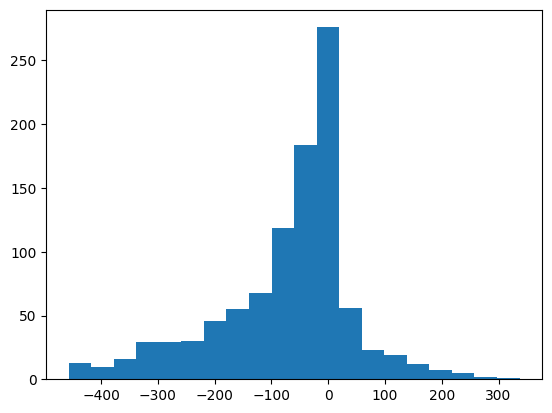

In [73]:
plt.hist(before_after_data['ridership_diff'].iloc[-1000:], bins=20)


In [ ]:
before_after_data.to_csv('../data/subway_ridership_diff.csv.gz', compression='gzip')